In [12]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("http://video.ittensive.com/python-advanced/rts-index.csv")
data["Years"]= data["Date"].apply(lambda x: x.split(".")[2])
data["Day"]= data["Date"].apply(lambda x: x.split(".")[0])
data["Month"]= data["Date"].apply(lambda x: x.split(".")[1])
data
print (data.head())


         Date     Open      Max      Min    Close  Trading Volume, USD  \
0  18.11.2019  1456.17  1461.20  1436.74  1443.02         9.016255e+08   
1  15.11.2019  1440.29  1450.84  1435.54  1449.42         8.869229e+08   
2  14.11.2019  1438.67  1448.54  1425.44  1436.98         1.149759e+09   
3  13.11.2019  1443.19  1443.19  1430.91  1437.85         8.875070e+08   
4  12.11.2019  1461.37  1471.19  1447.83  1449.35         9.772689e+08   

   Market Capitalization, USD  Unnamed: 7 Years Day Month  
0                1.799203e+11         NaN  2019  18    11  
1                1.807188e+11         NaN  2019  15    11  
2                1.791677e+11         NaN  2019  14    11  
3                1.792759e+11         NaN  2019  13    11  
4                1.807094e+11         NaN  2019  12    11  


In [31]:
data_2019 = data[data["Years"] == "2019"].sort_values(by = ["Years","Month","Day"]).set_index(["Month","Day"]) 
data_2018 = data[data["Years"] == "2018"].sort_values(by = ["Years","Month","Day"]).set_index(["Month","Day"]) 
data_2017 = data[data["Years"] == "2017"].sort_values(by = ["Years","Month","Day"]).set_index(["Month","Day"]) 

print (data_2019.head())


                 Date     Open      Max      Min    Close  \
Month Day                                                   
01    03   03.01.2019  1069.39  1093.22  1063.63  1086.80   
      04   04.01.2019  1090.96  1118.03  1090.96  1118.03   
      08   08.01.2019  1116.61  1127.70  1114.38  1122.90   
      09   09.01.2019  1127.09  1137.15  1124.42  1135.51   
      10   10.01.2019  1139.22  1142.32  1129.15  1142.32   

           Trading Volume, USD  Market Capitalization, USD  Unnamed: 7 Years  
Month Day                                                                     
01    03           334969354.0                1.428818e+11         NaN  2019  
      04           294364853.0                1.469878e+11         NaN  2019  
      08           401837374.0                1.476271e+11         NaN  2019  
      09           544061590.0                1.492849e+11         NaN  2019  
      10           513228140.0                1.501805e+11         NaN  2019  


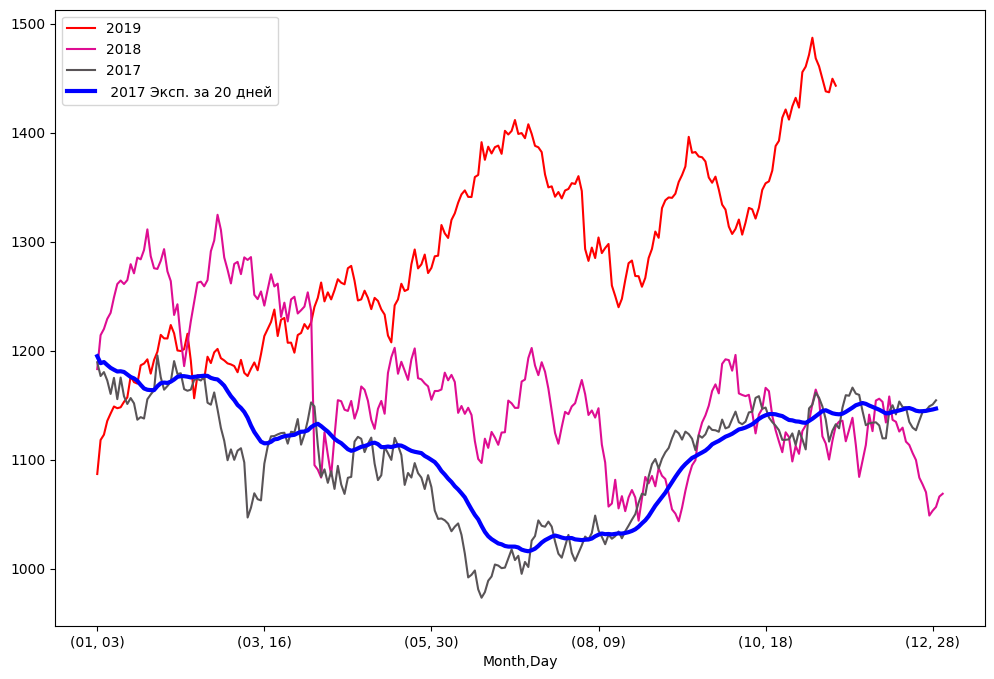

In [35]:
fig = plt.figure(figsize=(12,8))
area = fig.add_subplot(1, 1, 1)

data_2019["Close"].plot(ax=area, color="red", label="2019")
data_2018["Close"].plot(ax=area, color="#DE0D92", label="2018")
data_2017["Close"].plot(ax=area, color="#595457", label="2017")
data_2017["Max"].ewm(span=20).mean().plot(ax=area, color="blue", label=" 2017 Эксп. за 20 дней", lw=3)
area.legend()
plt.show()

In [33]:

data_fall = data_2019[data_2019["Close"] < data_2017[0:len(data_2019)]]
print (data_fall)

C:\Users\famely\AppData\Local\Temp\ipykernel_18944\410988750.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_fall = data_2019[data_2019["Close"] < data_2017[0:len(data_2019)]]


ValueError: cannot join with no overlapping index names